In [5]:
from tensorflow import keras
from keras.layers import (Conv2D, SeparableConv2D, DepthwiseConv2D, BatchNormalization, MaxPooling2D, SpatialDropout2D,
                          Input, Embedding, LSTM, Bidirectional, Conv1D, SpatialDropout1D, GlobalMaxPooling1D,
                          MaxPooling1D, LocallyConnected2D, Dense, Flatten, Dropout, Add)
from keras import Model
from visualize import visualize
import visualize as vis

In [2]:
count_map = {}


def generate_dense_blocks(features, num_blocks, input_layer, name_template="dense"):
    global count_map
    _l = input_layer
    for i in range(num_blocks):
        _l = BatchNormalization()(_l)
        count_to_use = count_map.get(name_template, 1)
        _l = Dense(features, activation='relu', name=f"{name_template}_{count_to_use}")(_l)
        count_map[name_template] = count_to_use + 1
        _l = Dropout(0.25)(_l)
    return _l

In [3]:
# Build the model
count_map = {}
activation = 'relu'
input_shape = 256
kernel = 3
pool = 2
padding = 'same'

dropout = 0.25

inputs = keras.Input(shape=input_shape)
features = 128
a = generate_dense_blocks(256, 1, inputs, name_template='a')
a1 = generate_dense_blocks(256, 1, a, name_template='a1')
a2 = generate_dense_blocks(256, 1, a, name_template='a2')
a = Add(name='sum_a')([a1, a2, a])
b = generate_dense_blocks(512, 1, inputs, name_template='b')
b1 = generate_dense_blocks(32, 2, b, name_template='b1')
b2 = generate_dense_blocks(32, 2, b, name_template='b2')
b = Add(name='sum_b')([b1, b2])
b = generate_dense_blocks(256, 2, b, name_template='b')
# c = generate_dense_blocks(features, 3, inputs, name_template='c')

a = Add(name='sum_ab')([a, b])

d = generate_dense_blocks(1024, 2, a, name_template='d')
e = generate_dense_blocks(32, 3, a, name_template='e')
# e1 = generate_dense_blocks(features, 2, e, name_template='e1')
e1 = generate_dense_blocks(1024, 2, e, name_template='e1')
e2 = Add(name="sum_b2_e")([e, b2])
e2 = generate_dense_blocks(1024, 2, e2, name_template='e2')
# f = generate_dense_blocks(features,4, a, name_template='f')
# e = Add(name='sum_e')([e1,e2])
g = Add(name='sum_d_e')([d, e1, e2])

y = Dropout(dropout, name='dropout_out')(g)
outputs = Dense(10, name='output', activation='softmax')(y)

model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.summary()
# visualize(model)

2023-02-03 10:11:55.221448: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-03 10:11:55.261803: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-03 10:11:55.264570: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-03 10:11:55.267559: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256)]        0           []                               
                                                                                                  
 batch_normalization_3 (BatchNo  (None, 256)         1024        ['input_1[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 b_1 (Dense)                    (None, 512)          131584      ['batch_normalization_3[0][0]']  
                                                                                                  
 dropout_3 (Dropout)            (None, 512)          0           ['b_1[0][0]']                

generated pdf file
Errors: 0, Warnings: 0, Badboxes: 0


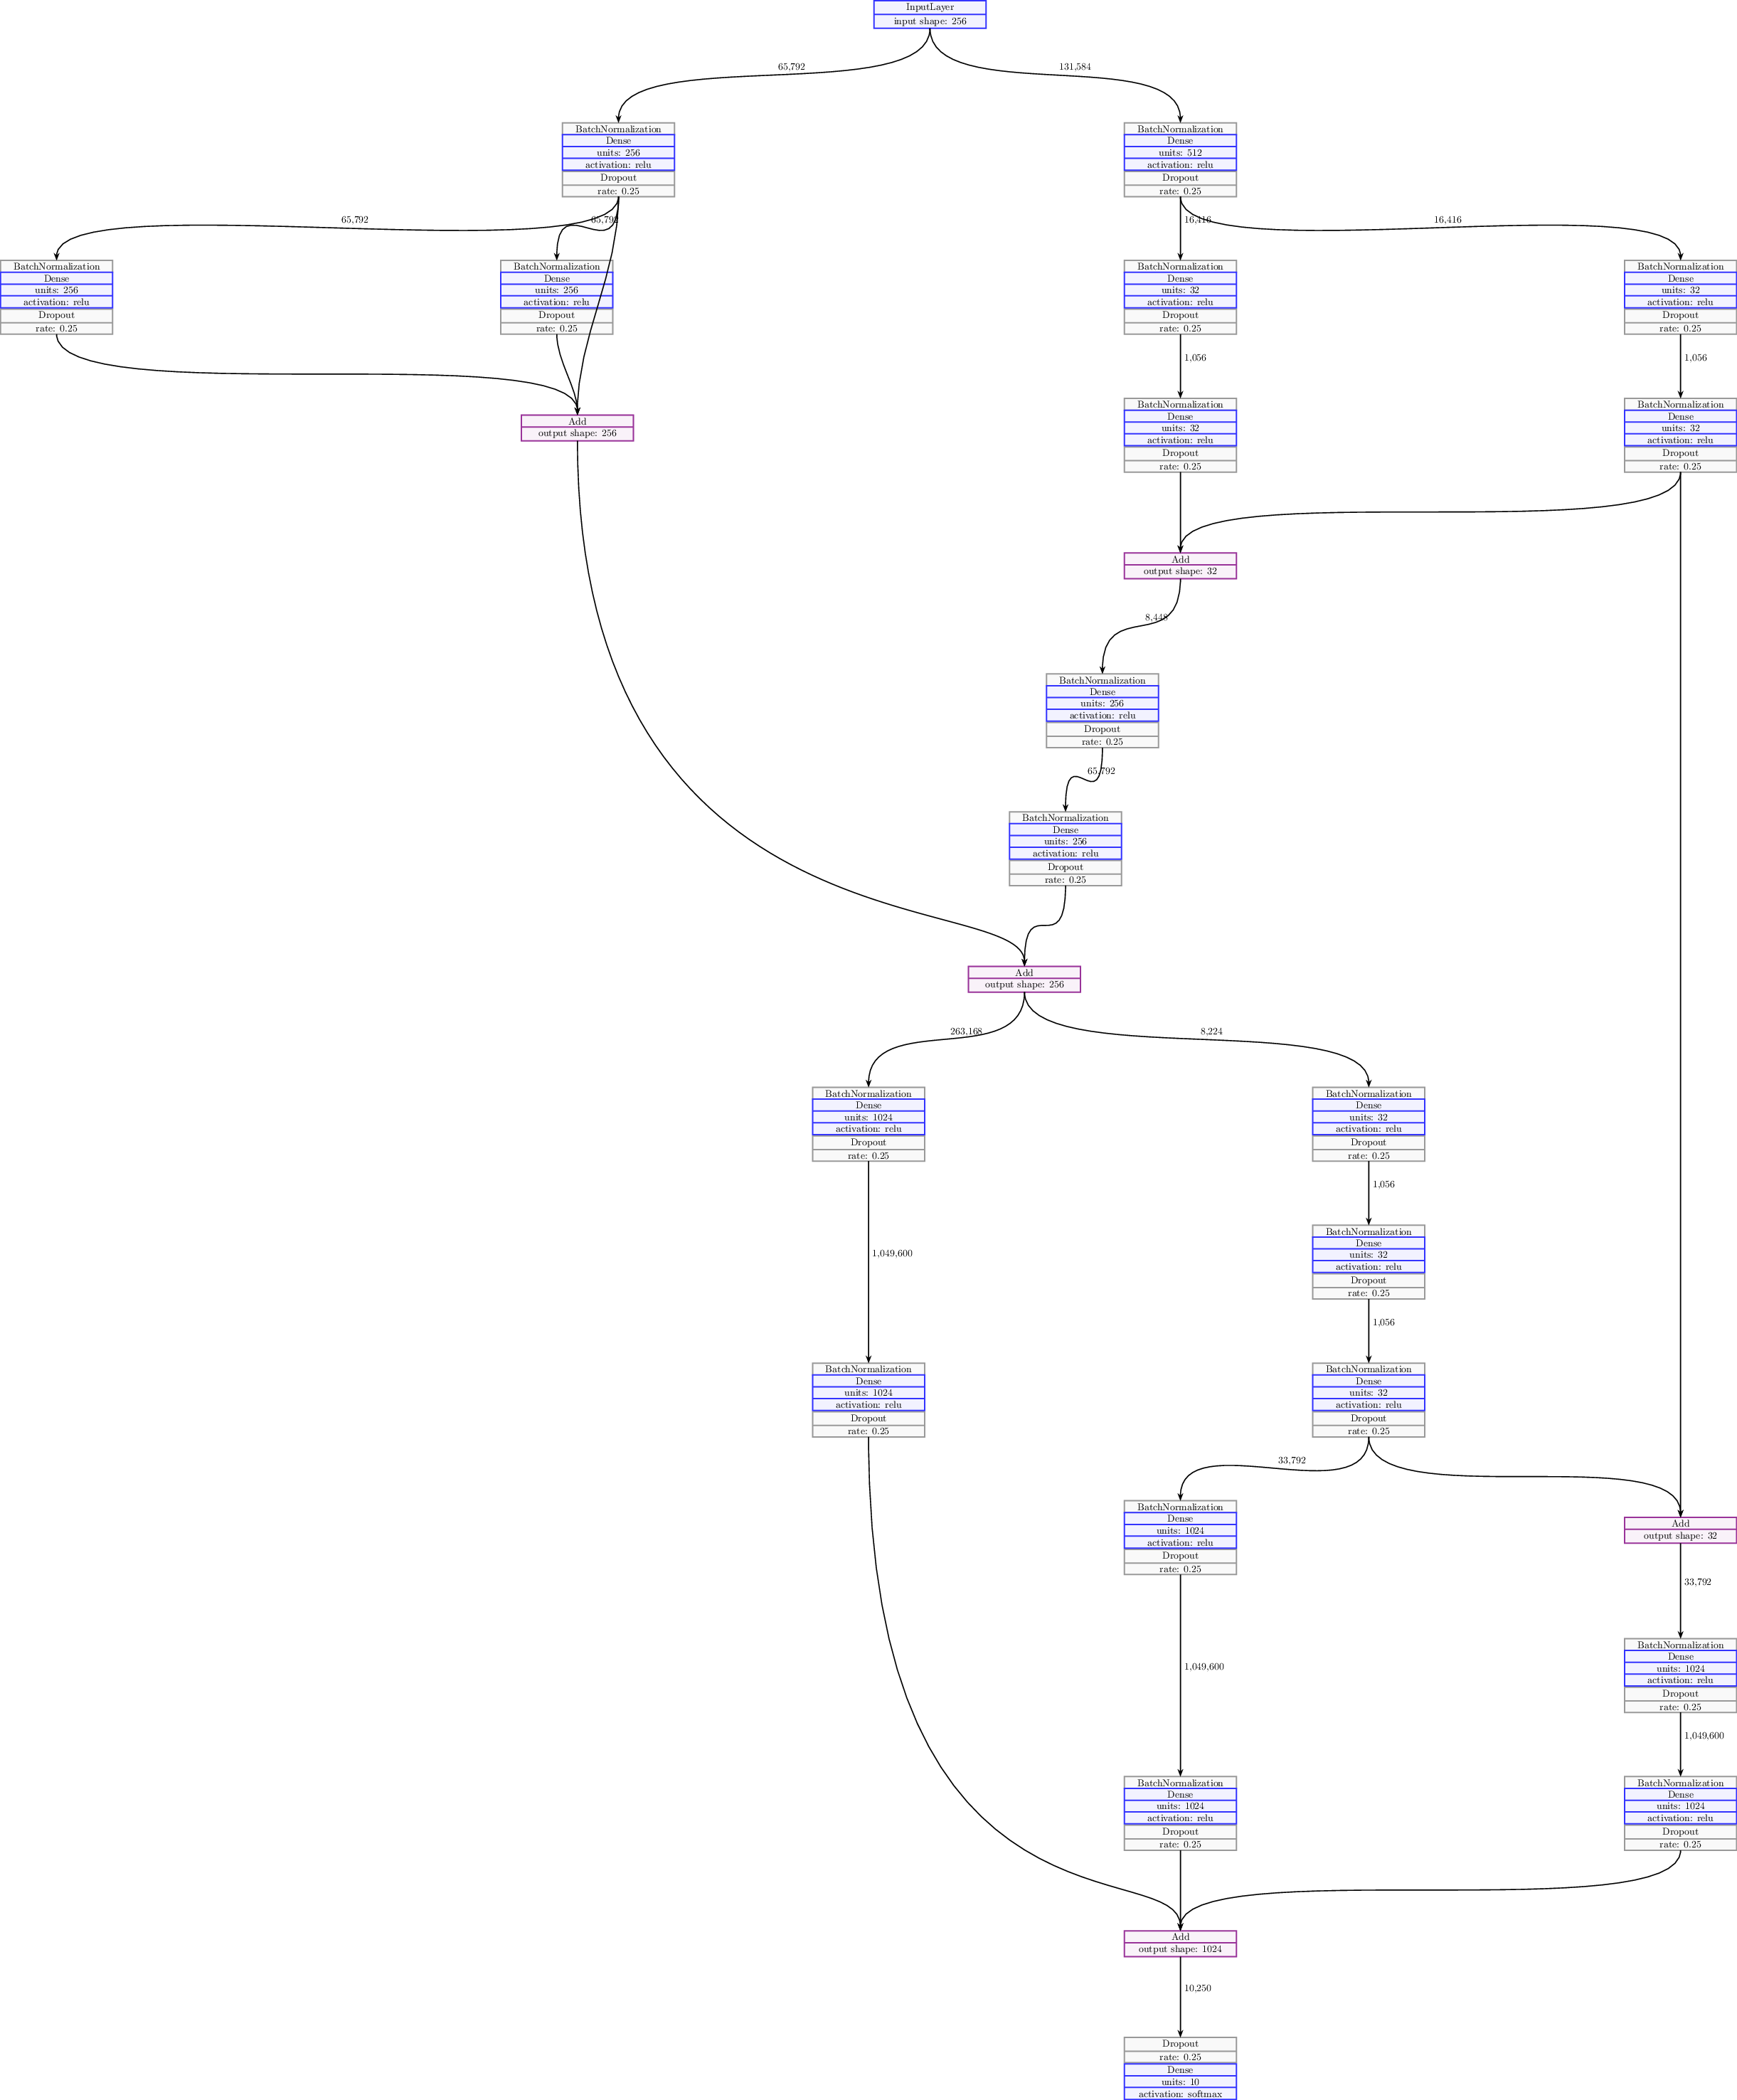

In [11]:
visualize(model, resolution=100, canvas_width=55, canvas_height=70)

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from tensorflow import keras
from keras.layers import (Conv2D, SeparableConv2D, DepthwiseConv2D, BatchNormalization, MaxPooling2D, SpatialDropout2D,
                          Input, Embedding, LSTM, Bidirectional, Conv1D, SpatialDropout1D, GlobalMaxPooling1D,
                          MaxPooling1D, LocallyConnected2D, Dense, Flatten, Dropout, Add)
from keras import Model
from visualize import visualize

In [102]:
# try different pretrained models, dont include weights because we are only interested in the architecture
pretrained_model = keras.applications.DenseNet121(include_top=False, weights=None, input_shape=(256, 256, 3))

# pretrained_model.summary()

visualize(pretrained_model, resolution=120, canvas_width=15, canvas_height=400)

/opt/conda/envs/pytorch/lib/python3.9/site-packages/pygraphviz/agraph.py:1405: RuntimeWarning: Warning: node 'input_90_group', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


Error while running command: pdflatex -file-line-error -interaction=nonstopmode -synctex=1 -output-format=pdf -output-directory=out generated_graph.tex > out/log.log
Error while generating pdf file
Errors: 0, Warnings: 0, Badboxes: 0


WandRuntimeError: MagickReadImage returns false, but did not raise ImageMagick  exception. This can occur when a delegate is missing, or returns EXIT_SUCCESS without generating a raster.